In [26]:
class KnowledgeGraph:
    def __init__(self):
        self.nodes = set()
        self.edges = []

    def add_node(self, node):
        self.nodes.add(node)

    def add_edge(self, node1, node2, relationship):
        self.edges.append((node1, node2, relationship))


In [27]:
# Create a knowledge graph instance
maritime_silk_road_graph = KnowledgeGraph()

# Add ports as nodes
maritime_silk_road_graph.add_node("Port A")
maritime_silk_road_graph.add_node("Port B")
maritime_silk_road_graph.add_node("Port C")
maritime_silk_road_graph.add_node("Port D")
# Add other entities like countries, trade routes, etc.

# Add relationships between nodes
maritime_silk_road_graph.add_edge("Port A", "Port B", "ConnectedTo")
maritime_silk_road_graph.add_edge("Port B", "Port C", "ConnectedTo")
maritime_silk_road_graph.add_edge("Port B", "Port D", "ConnectedTo")
# Add other relationships based on historical data


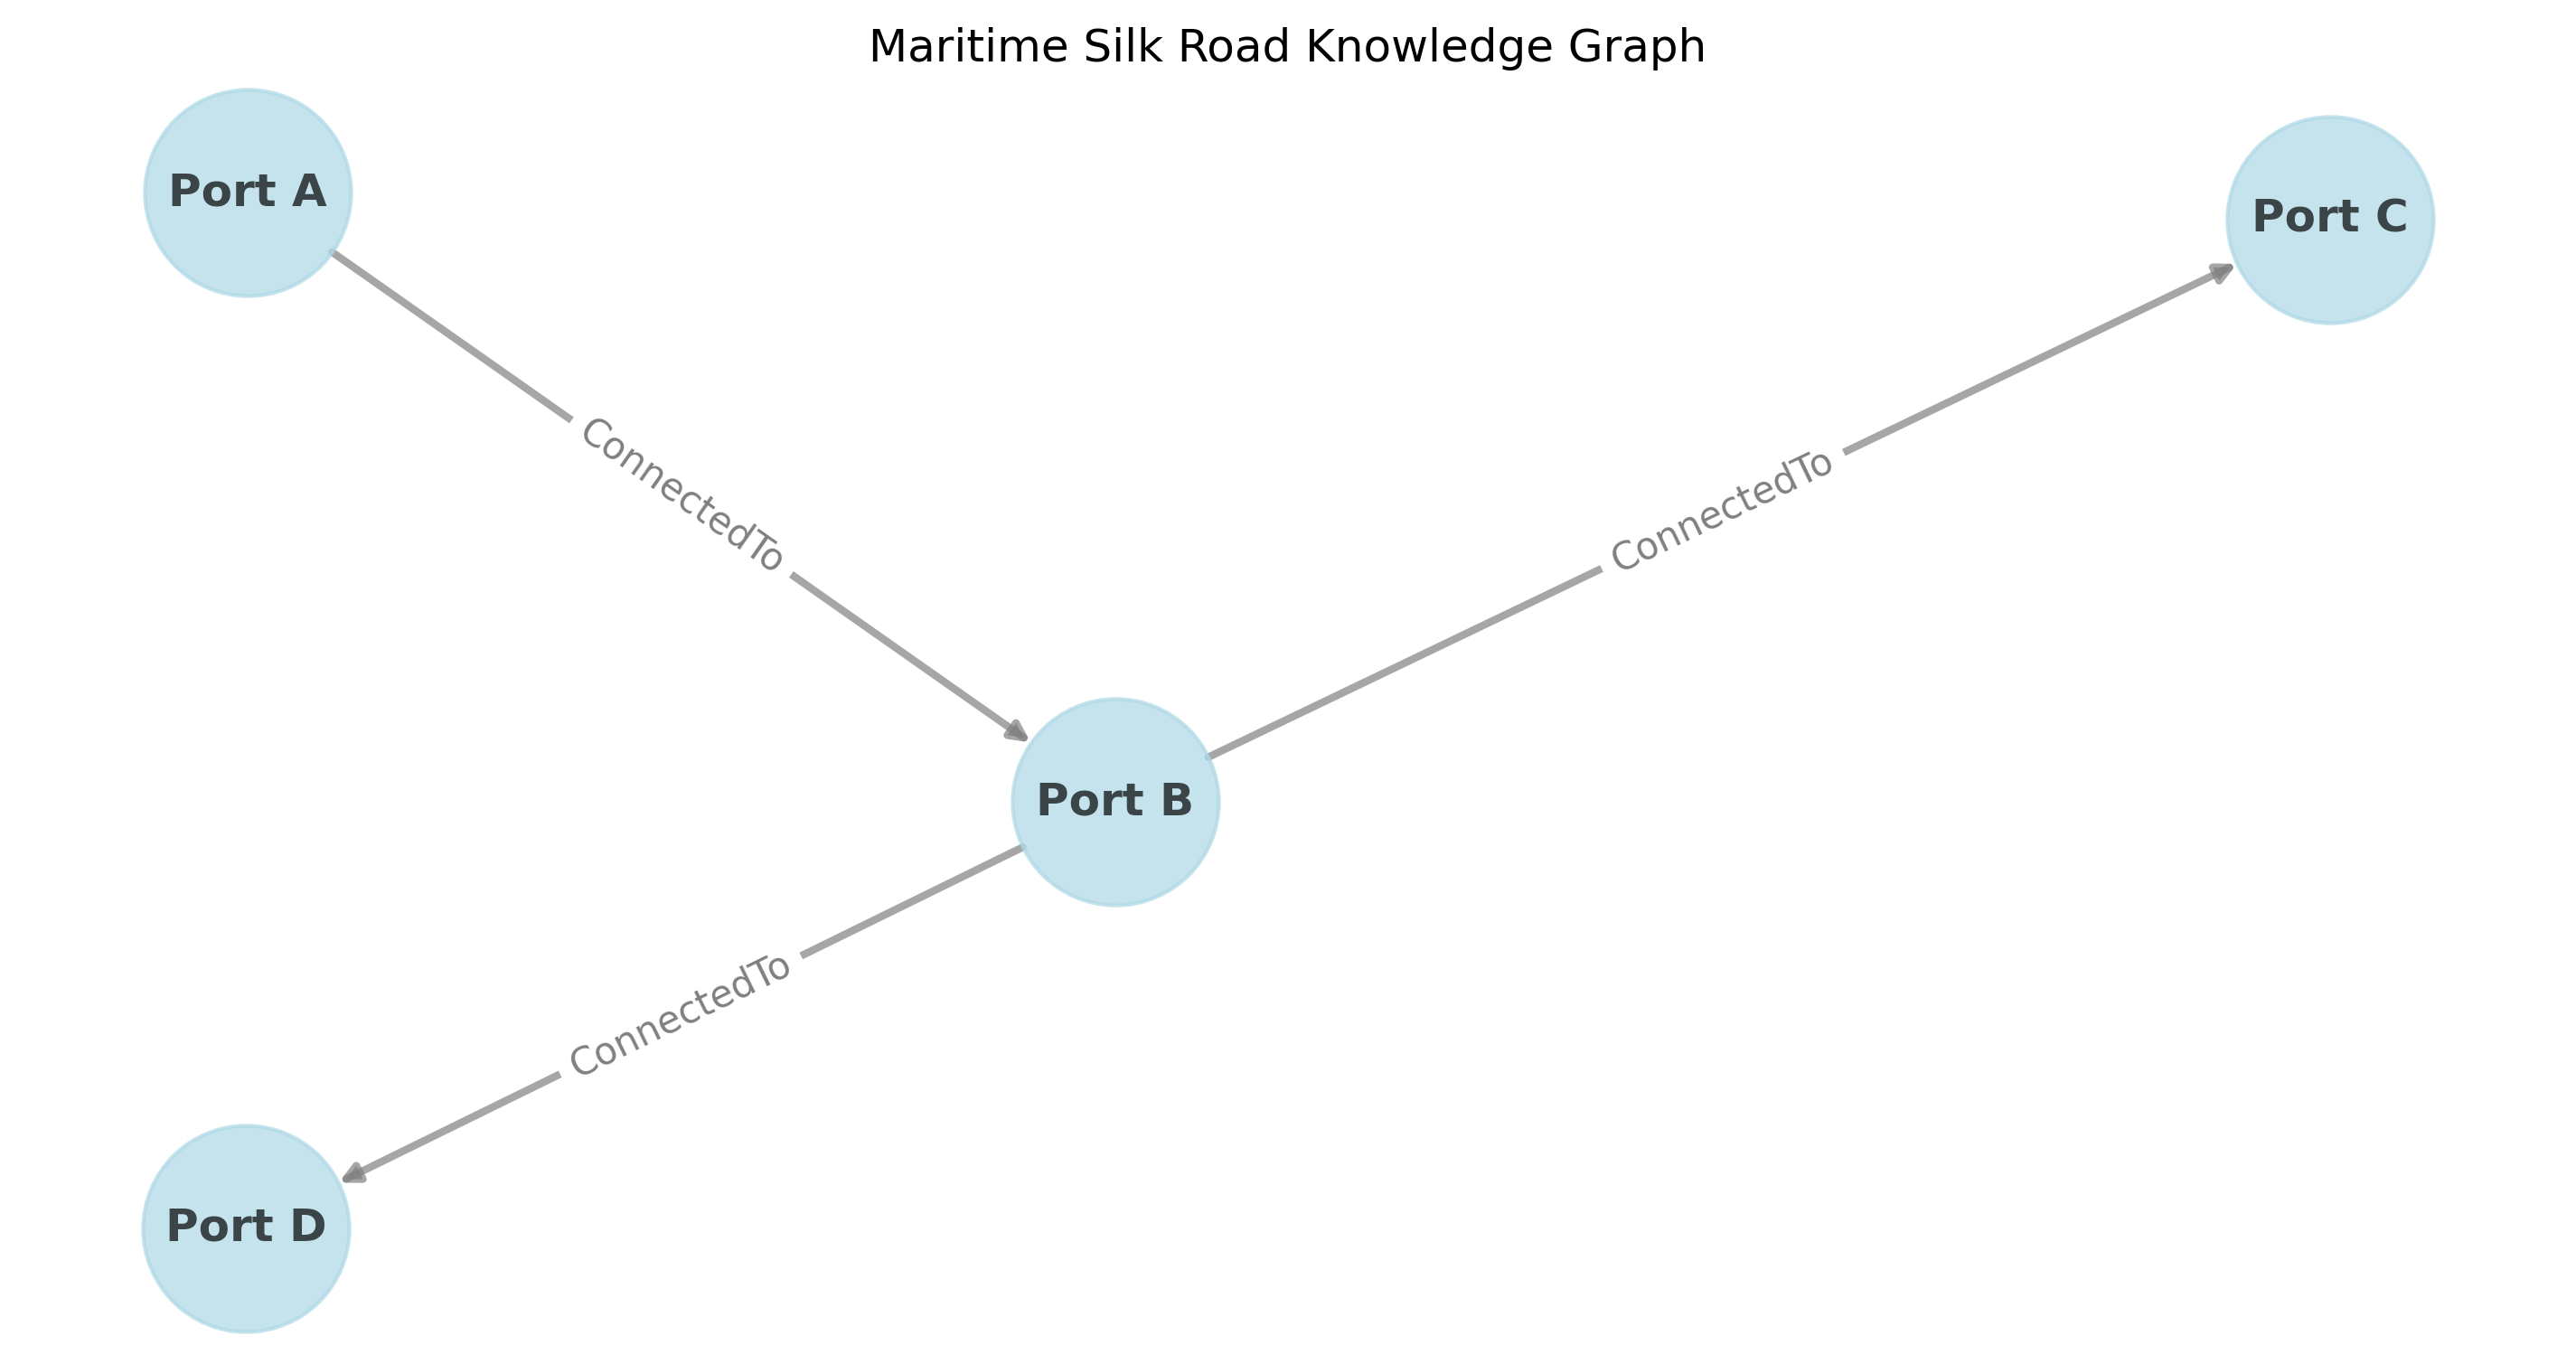

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the knowledge graph
for node in maritime_silk_road_graph.nodes:
    G.add_node(node)

for edge in maritime_silk_road_graph.edges:
    G.add_edge(edge[0], edge[1], relationship=edge[2])

# You need to have actual distances for the edges
# Replace these with your actual distances
edge_distances = {("Port A", "Port B"): 500, ("Port B", "Port C"): 700}

# Compute positions based on distances
pos = nx.spring_layout(G)
for edge, distance in edge_distances.items():
    node1, node2 = edge
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    pos[node1] = (x1, y1)
    pos[node2] = (x1 + distance, y2)  # Adjust the x-coordinate based on distance

fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=3000, font_size=12, font_weight='bold', width=2, edge_color='gray', alpha=0.7, ax=ax)

# Draw edge labels
edge_labels = {(edge[0], edge[1]): G.edges[edge]["relationship"] for edge in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='gray')

plt.title("Maritime Silk Road Knowledge Graph")

# Save as PNG
plt.savefig("maritime_silk_road_graph.png")

# Save as PDF
plt.savefig("maritime_silk_road_graph.pdf")

plt.show()


In [34]:
def get_related_ports(graph, port_name):
    related_ports = []
    for edge in graph.edges:
        if edge[0] == port_name and edge[2] == "ConnectedTo":
            related_ports.append(edge[1])
    return related_ports

# Example query
port_name = "Port A"
related_ports = get_related_ports(maritime_silk_road_graph, port_name)
print(f"Ports connected to {port_name}: {related_ports}")

Ports connected to Port A: ['Port B']
